<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Андрей! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Тренировочная-и-тестовая-выборки" data-toc-modified-id="Тренировочная-и-тестовая-выборки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Тренировочная и тестовая выборки</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('averaged_perceptron_tagger')
import numpy as np
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
from numpy.random import RandomState
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
from nltk.stem import WordNetLemmatizer 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
data = pd.read_csv('/datasets/toxic_comments.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


Посмотрим на содержимое данных.

In [4]:
pd.set_option('display.max_colwidth', 1000)

In [5]:
data.head()

,Unnamed: 0,text,toxic
0,0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,4,"You, sir, are my hero. Any chance you remember what page that's on?",0


Текст комеентариев написан на английском языке. В дальнейшем нужно подобрать корректный лемматизатор.

Проверим, есть ли дубликаты в наборе.

In [6]:
print('\nКоличество дубликатов в наборе данных -', data.duplicated().sum())


Количество дубликатов в наборе данных - 0


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Данные загружены и исследованы.</div>

Посмотрим на баланс классов.

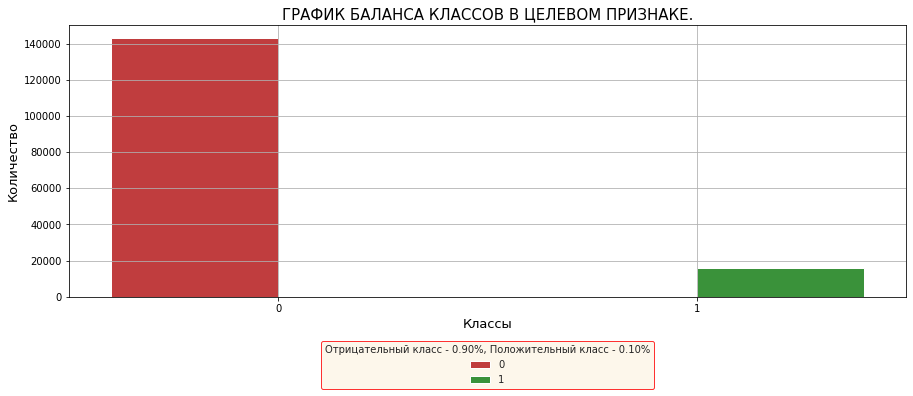

In [7]:
plt.figure(figsize=[15, 5])
plt.title('ГРАФИК БАЛАНСА КЛАССОВ В ЦЕЛЕВОМ ПРИЗНАКЕ.', fontsize=15)
palette = {0: 'tab:red', 1: 'tab:green'}
sns.set_style('darkgrid')
sns.barplot(x=data['toxic'].value_counts().index,
            y=data['toxic'].value_counts(),
            hue=data['toxic'].value_counts().index,
           palette=palette)
plt.ylabel('Количество', fontsize=13)
plt.xlabel('Классы', fontsize=13)
plt.grid(True)
negative_class = data['toxic'].value_counts(normalize=True)[0]
positive_class = data['toxic'].value_counts(normalize=True)[1]
plt.legend(title=f'Отрицательный класс - {negative_class:.2f}%, Положительный класс - {positive_class:.2f}%', 
           loc='center', 
           edgecolor = 'r',
           facecolor = 'oldlace',
           bbox_to_anchor=(0.5, -0.25));


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, исследован баланс классов. Это важная информация для задачи классификации.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Прошу избавиться от вывода текстового представления python-объектов, которые возвращают используемые тобой функции например 
    
    <matplotlib.legend.Legend at 0x7f5705b335b0>

    
Это можно сделать достаточно просто, если добавить  точку с запятой после последней команды в ячейке.
   
</div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Исправил.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>минутка теории</b> 
 По умолчанию jupyter notebook выводит результат вычислений в последней строке ячейки, если этот результат не записан в переменную. Мы часто пользуемся этим, обратившись к какому-нибудь объекту в последней строке и видим результат без дополнительных print() или dispay()
    
    
  Ниже три ячейки с кодом. Обрати внимание, если просто сделать вычисление - то результат выводится, но если добавить точку с запятой или записать результат в переменную, то ничего не происходит. Обрати внимание, когда происходит вывод:
   - последня строка
   - нет точки с запятой в конце
    
   - результат не записан в переменную
 
И досточно убрать одно из этих условий, как вывода нет.

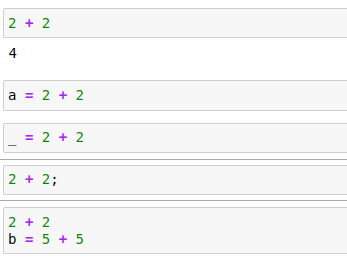    

 Функции matlitlib не только выводят графики, но и возвращают python объекты axis. Это внутренняя кухня, чтобы можно было строить сложные графики. Но для нас побочным эффектом является то, что в ноутбуке мы видим текстовое предоставление объекта, которое выводит ноутбук. И для красоты такое поведение стоит заблокировать. 



</div>

Присутствует дисбаланс классов.

Рассмотрим тест комментариев.

In [8]:
data.head()

,Unnamed: 0,text,toxic
0,0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,4,"You, sir, are my hero. Any chance you remember what page that's on?",0


В тексте присутствуют неинформативные символы. Для улучшения работы будущих моделей необходимо "почистить" текст.

In [9]:
data = data.sample(50000).reset_index(drop=True)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Загвоздка в том, что чем меньше данных, тем сложнее получить хорошую метрику.  Для лучшего качества я наоборот советую использовать полный датасет и отрезать на тестирование 10%. 
    
На 50_000 записей можно получить проходную метрику, но прийдется постараться. 

</div>

In [10]:
def clear_text(dirty_string):
    new_string = dirty_string.lower()
    new_string = re.sub(r"(?:\n|\r)", "", new_string)
    new_string = re.sub(r'[^a-zA-Z\ ]', " ", new_string).strip()
    return new_string

In [11]:
%%time
data['text'] = data['text'].apply(clear_text)

CPU times: user 940 ms, sys: 2.59 ms, total: 943 ms
Wall time: 953 ms


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 

Текст очищен, но я советую при чистке оставить символ ' (апостроф), он играет важную роль в английском языке.
</div>

In [12]:
data.head()

,Unnamed: 0,text,toxic
0,43449,i would somewhat agree with laurahale on the point that gas are not really good articles i have seen some comments on article talk pages post ga or during pr or fac showing discontent on the ga review that was done some key points on the topic are missing or language is poor or some other sorts i have recently also been in dykns where they felt as good as facs with all grilling of critical points but i do not understand lh s opposition for a new slot of gas on main page in case lh has doubts against the ga review process i would suggest that gars should also be done by multiple editors single editor doing a ga review could sometimes be a reason for missing or overlooking some factors in the article i have seen multiple editors getting involved in dykns but hardly seen that happening on gas t c,0
1,5703,every other press agency said the crowd was chanting you re a tory too only the daily mail which by the way is a tory paper reported that the croud chanted fucking tory jew he is a dispicable scab but that is because of his politics not his liniage,1
2,31723,my abuelo told me he was distant but related,0
3,11835,just to make it clear you may not put in any links whatsoever to thecivilengg com o,0
4,156644,chelmer valley high school hi i wonder if you would revisist wikipedia articles for deletion chelmer valley high school please the article has been rewritten showing the school has been independently judged to be outstanding with a world record breaking gymnastics team,0


Теперь приведем все слова к их лемме.

In [13]:
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
def lemmatize_sentence(sentence):
    lemmatized_text = []
    lst_with_words = nltk.word_tokenize(sentence)
    for word, tag in nltk.pos_tag(lst_with_words):
        if tag.startswith('J'):
            initial_word = lemmatizer.lemmatize(word, pos='a')
        elif tag.startswith('V'):
            initial_word = lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('N'):
            initial_word = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('R'):
            initial_word = lemmatizer.lemmatize(word, pos='r')
        else:
            initial_word = word
        lemmatized_text.append(initial_word)
    return " ".join(lemmatized_text)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Молодец, что используешь лемматизатор WordNetLemmatizer. Но в данном случае он отработал не очень хорошо, и если присмотреться к тексту это хорошо видно. Например, в четвертой строке видим глагол are, но его начальная форма - be. Аналогично в нулевой строке есть глагол made, а его начальная форма make. 
    
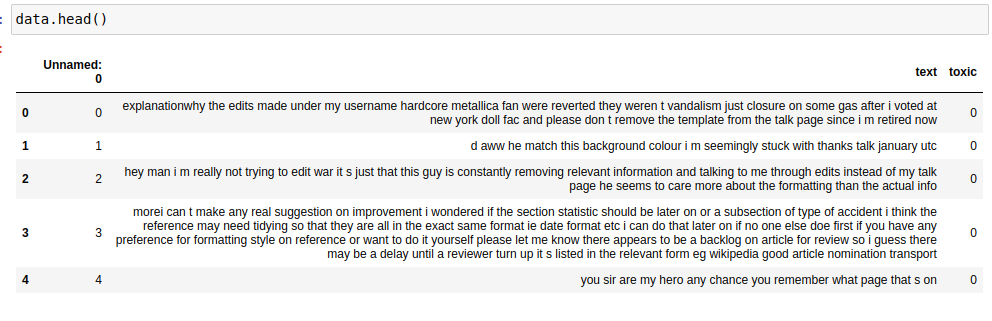    
    
Кроме самого слова в лемматизатор нужно передать дополнительную информацию о части речи слова (POS тег). 
    
    
    
Ты можешь доработать подход с WordNetLemmatizer или использовать spaCy, там все отрабатывает "из коробки". Можешь посмотреть вот эту статью.  


https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/
    
Хочу обратить твое внимание, что код из вышеуказанной статьи выполняется несколько дольше, чем оптимизированный, вот из этого топика
    
https://stackoverflow.com/questions/50992974/nltk-wordnetlemmatizer-not-lemmatizing-as-expected    
    
    
    
Совет - старайся сразу проверять  результаты лемматизации. Например, для предложения
    
    sentence = "The striped bats are hanging on their feet for best"
    
После лемматизации должен получиться вот такой результат
    
    "the strip bat be hang on their foot for best"    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Исправил.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [16]:
%%time
data['text'] = data['text'].progress_apply(lemmatize_sentence)

  0%|          | 0/50000 [00:00<?, ?it/s]

CPU times: user 3min 25s, sys: 2.41 s, total: 3min 27s
Wall time: 3min 34s


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Правильная лемматизация длится долго... Минут 20-30, в зависимости от мощности компьютера. Гораздо комфортнее видеть прогресс выполнения этой длительной операции, чем сидеть и гадать "а не зависла ли она", "закончит только к утру или через 30 секунд"? Можно воспользоваться прогресс -баром от tqdm.
    
     
    from tqdm.notebook import tqdm
    tqdm.pandas()

    data['lemm_text'] = data['text'].progress_apply(lemmafunction)
    
    
    
    
</div>



### Тренировочная и тестовая выборки

In [17]:
features = data.drop(['toxic'], axis=1)
target = data['toxic']

In [18]:
features_train, features_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    
Данные разделены на выборки. Но я бы посоветовал тебе изменить пропорции и выделить на тест 10%. Причина простая - модели, которые мы обучаем чувствительны к объему обучающих данных. Чем больше слов они увидят в процессе обучения, и оценят их вклад в "токсичность", тем лучше будут модели. А для корректного тестирования и 10% данных вполне достаточно, учитывая немаленький размер датасета.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Старайся не делать такие длинные строки. Стандарт PEP8 регулирует длину строки 79 символов. Придерживаться такого очень сложно, но лучше хотя-бы вмещать в экран, чтобы не приходилось использовать scroll.
    
    
А еще  если сомневаешься, как отформатировать правильно - всегда можно найти какой-нибудь оналйн-форматтер, например этот
    
  https://extendsclass.com/python-formatter.html
    
    
В качестве дополнительного развития могу порекомендоваь книгу "PYTHON  чистый код для продолжающих", Эл Свейгарт    
    
   
    
    
</div>

In [19]:
del features, target, data

В качестве метода векторизации выбрал TF-IDF. Методу так же передадим атрибут stop_words, для того чтобы избавится от неинформативных слов. Обучать векторизатор будем на тренировочной выборке (корпусе).

In [20]:
corpus_train = features_train['text']
corpus_test = features_test['text']


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Не нужно (и даже вредно) менять кодировку на unicode. Изменение кодировки увеличивает количество оперативной памяти, необходимой для хранения текстов и может привсти к падению ядра. Но наши тексты написаны латиницей, поэтому вполне достаточно кодировки по умолчанию.

Возможно изменно из-за этого тебе не хватает оперативки и ты постоянно удаляешь лишние объекты.
</div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Исправил.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [21]:
del features_train, features_test

Учитывая большое количество слов, буду использовать подход основанный на n-граммах, так же ограничим количество векторов параметрами min_df и max_df.

In [22]:
count_tf_idf = TfidfVectorizer(ngram_range=(1,2),
                               stop_words=stop_words,
                               min_df=3,
                               max_df=0.9,
                               strip_accents='unicode',
                               use_idf=1,
                               smooth_idf=1,
                               sublinear_tf=1)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
С гиперпараметрами TfidfVectorizer будь осторожен. Можно сильно "обрезать" признаки и моделям будет сложно научиться.
    
Если совсем зайдешь в тупик - попробуй гиперпараметры по умолчинаю, без дополнительной настройки. Да,там получается много признаков, но нужные метрики выбиваются.    
</div>

In [23]:
tf_df = count_tf_idf.fit(corpus_train)

In [24]:
x_train = tf_df.transform(corpus_train)
x_test = tf_df.transform(corpus_test)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Молодец, получены признаки из текстов с помощью TF-IDF. И совершенно верно векторайзер вначале обучен на обучающем наборе и затем применен к тестовому</div>

In [25]:
del count_tf_idf, tf_df, corpus_train, corpus_test

**Вывод**

* Из текста удалены все не информативные символы и слова.

* Каждое слово приведено к его лемме.

* Слова в тексте векторизованы.

* Обнаружен дисбаланс классов.

## Обучение

In [26]:
models_scors = pd.DataFrame(columns = ['model', 'F1'])

In [27]:
dct_with_models_param = {}

In [28]:
state = RandomState(12345)

Для дальнейшего обучения выбрал несколько моделей.

**LogisticRegression**

In [29]:
%%time
model_lr_for_search = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)
params = dict(C=np.arange(1, 20, 1))
search_for_lr = RandomizedSearchCV(model_lr_for_search, 
                                   params,
                                   scoring='f1',
                                   random_state=state)
search_for_lr.fit(x_train, y_train)
dct_with_models_param['LR'] = search_for_lr.best_params_
dct_with_models_param['LR'].update(train_f1=search_for_lr.best_score_)
print("F1 Score:", search_for_lr.best_score_)
models_scors = models_scors.append({'model' : 'LinearRegression',
                     'F1' : search_for_lr.best_score_}, ignore_index=True)

F1 Score: 0.7475778636194272
CPU times: user 3min 38s, sys: 4min 58s, total: 8min 37s
Wall time: 8min 37s


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Поиск по сетке использует крос-валидацию.  А кросс-валидация одновремено с извлечением признаков из текстов требует особого подхода. Ты помнишь, что векторайзер мы обучали на обучающей выборке а применяли к тестовой. Что происходит при кросс-валидации? Ты разбиваешь большую обучающую выборку на несколько фолдов, из них выделяешь часть на обучение, часть на валидацию.  Но признаки (TF-IDF) уже обучены на всем наборе (обучающий + валидационный). Получается утечка данных. Чтобы избежать её нужно использовать pipeline из векторайзера и модели.
    
Пример такого пайплайна можно посмотреть в официальной документации
    
  https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_text_feature_extraction.html
    
И еще полезные материалы:
    
  https://newtechaudit.ru/pipeline-v-rabote-s-dannymi/      
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Подбор гиперпараметра С это очень правильное решение. Линейные модели очень хорошо работают с признаками, полученными из текстов. С помощью TF-IDF мы получили очень длинные разряженные вектора. И действительно, они очень длинные (на полном датасете с дефолтными настройками длина может достигать 150_000), при этом очень мало значений отличаются от нуля. Так вот, линейные модели гораздо лучше деревьев справляются с такими признаками. Но им нужно помочь - и ослабить регуляризацию, т.к. она заметно вырастает из за большого количества признаков. И делаем мы это как раз подбирая гиперпараметр С.
    

</div>

In [30]:
#del model_lr_for_search, search_for_lr

In [31]:
#%%time
#test_model_lr = LogisticRegression(solver='liblinear',
#                                   C=dct_with_models_param['LR']['C'],
#                                   class_weight='balanced',
#                                   random_state=state,
#                                   max_iter=1000)
#test_model_lr.fit(x_train, y_train)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не нужно переобучать модель заново, ведь лучшая модель, уже обученая на всех доступных данных уже хранится в атрибуте best_estimator_  
        
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Пожалуйста покажи любопытному читателю, какую метрику удалось получить с помощью  логистической регрессии.     
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Указал вывод F1 меры во всех моделях.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

**Модель DecisionTreeClassifier**

In [32]:
%%time
model_dtc_for_search = DecisionTreeClassifier(class_weight='balanced')
params = dict(max_depth=np.arange(10, 100, 10),
              splitter=['best', 'random'],
              min_samples_leaf=[1, 3])
search_for_dtc = RandomizedSearchCV(model_dtc_for_search, 
                                   params,
                                   scoring='f1',
                                   random_state=state)
search_for_dtc.fit(x_train, y_train)
dct_with_models_param['DTC'] = search_for_dtc.best_params_
dct_with_models_param['DTC'].update(train_f1=search_for_dtc.best_score_)
print("F1 score:", search_for_dtc.best_score_)
models_scors = models_scors.append({'model' : 'DecisionTreeClassifier',
                     'F1' : search_for_dtc.best_score_}, ignore_index=True)

F1 score: 0.6301328871492846
CPU times: user 7min, sys: 3.21 s, total: 7min 3s
Wall time: 7min 3s


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Здесь тоже возникают утечки, вязанные с кросс-валидацией над признаками, полученными применением TfidfVectorizer ко всей обучающей выборке.      
</div>

In [33]:
#del model_dtc_for_search, search_for_dtc

In [34]:
#%%time
#test_model_dtc = DecisionTreeClassifier(max_depth=dct_with_models_param['DTC']['max_depth'], 
#                                       splitter=dct_with_models_param['DTC']['splitter'],
#                                       min_samples_leaf=dct_with_models_param['DTC']['min_samples_leaf'],
#                                       class_weight='balanced',
#                                       random_state=state)
#test_model_dtc.fit(x_train, y_train)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не нужно переобучать модель заново, ведь лучшая модель, уже обученая на всех доступных данных уже хранится в атрибуте best_estimator_  
        
</div>

**Модель LinearSVC**

In [35]:
%%time
model_lsvc_for_search = LinearSVC(random_state=state, class_weight='balanced')
params = dict(C=np.arange(0.1, 1, 0.1))
search_for_lsvc = RandomizedSearchCV(model_lsvc_for_search, 
                                   params,
                                   scoring='f1',
                                   random_state=state)
search_for_lsvc.fit(x_train, y_train)
dct_with_models_param['LinearSVC'] = search_for_lsvc.best_params_
dct_with_models_param['LinearSVC'].update(train_f1=search_for_lsvc.best_score_)
print("F1 score:", search_for_lsvc.best_score_)
models_scors = models_scors.append({'model' : 'LinearSVC',
                     'F1' : search_for_lsvc.best_score_}, ignore_index=True)

F1 score: 0.7426027323230185
CPU times: user 18.3 s, sys: 78.6 ms, total: 18.3 s
Wall time: 18.5 s


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Здесь тоже возникают утечки, вязанные с кросс-валидацией над признаками, полученными применением TfidfVectorizer ко всей обучающей выборке.      
</div>

In [36]:
#del model_lsvc_for_search, search_for_lsvc

In [37]:
#%%time
#test_model_lsvc = LinearSVC(C=dct_with_models_param['LinearSVC']['C'], 
#                          class_weight='balanced',
#                          random_state=state)
#test_model_lsvc.fit(x_train, y_train)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не нужно переобучать модель заново, ведь лучшая модель, уже обученая на всех доступных данных уже хранится в атрибуте best_estimator_  
        
</div>

**Модель MultinomialNB**

In [38]:
%%time
model_mnb_for_search = MultinomialNB()
params = dict(alpha=[0,1], fit_prior=[True, False])
search_for_mnb = RandomizedSearchCV(model_mnb_for_search,
                                    params,
                                    scoring='f1')
search_for_mnb.fit(x_train, y_train)
dct_with_models_param['MNB'] = search_for_mnb.best_params_
dct_with_models_param['MNB'].update(train_f1=search_for_mnb.best_score_)
print("F1 score:", search_for_mnb.best_score_)
models_scors = models_scors.append({'model' : 'MultinomialNB',
                     'F1' : search_for_mnb.best_score_}, ignore_index=True)

F1 score: 0.5990105405794524
CPU times: user 527 ms, sys: 1.42 ms, total: 528 ms
Wall time: 527 ms


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Здесь тоже возникают утечки, вязанные с кросс-валидацией над признаками, полученными применением TfidfVectorizer ко всей обучающей выборке.      
</div>

In [39]:
#del model_mnb_for_search, search_for_mnb

In [40]:
#%%time
#test_model_mnb = MultinomialNB(alpha=dct_with_models_param['MNB']['alpha'], 
#                          fit_prior=dct_with_models_param['MNB']['fit_prior'])
#test_model_mnb.fit(x_train, y_train)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не нужно переобучать модель заново, ведь лучшая модель, уже обученая на всех доступных данных уже хранится в атрибуте best_estimator_  
        
</div>

**Модель KNeighborsClassifier**

In [41]:
%%time
model_knb_for_search = KNeighborsClassifier()
params = dict(weights=['uniform', 'distance'],
              p=[1,2],
              leaf_size=np.arange(10,40,1),
              metric=['minkowski', 'chebyshev'],
              n_neighbors=np.arange(5, 40, 10))
search_for_knb = RandomizedSearchCV(model_knb_for_search,
                                    params,
                                    scoring='f1')
search_for_knb.fit(x_train, y_train)
dct_with_models_param['KNB'] = search_for_knb.best_params_
dct_with_models_param['KNB'].update(train_f1=search_for_knb.best_score_)
print("F1 score:", search_for_knb.best_score_)
models_scors = models_scors.append({'model' : 'KNeighborsClassifier',
                     'F1' : search_for_knb.best_score_}, ignore_index=True)

F1 score: 0.05437418992445538
CPU times: user 20min 41s, sys: 1min 6s, total: 21min 47s
Wall time: 21min 48s


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Здесь тоже возникают утечки, вязанные с кросс-валидацией над признаками, полученными применением TfidfVectorizer ко всей обучающей выборке.      
</div>

In [42]:
#del model_knb_for_search, search_for_knb

In [43]:
#%%time
#test_model_knb = KNeighborsClassifier(weights=dct_with_models_param['KNB']['weights'],
#                                      p=dct_with_models_param['KNB']['p'],
#                                      n_neighbors=dct_with_models_param['KNB']['n_neighbors'],
#                                      leaf_size=dct_with_models_param['KNB']['leaf_size'],
#                                      metric=dct_with_models_param['KNB']['metric'])
#test_model_knb.fit(x_train, y_train)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не нужно переобучать модель заново, ведь лучшая модель, уже обученая на всех доступных данных уже хранится в атрибуте best_estimator_  
        
</div>

In [44]:
dct_with_models_param['KNB']

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 15,
 'metric': 'minkowski',
 'leaf_size': 25,
 'train_f1': 0.05437418992445538}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста покажи какие результаты ты получил с помощью кросс-валидации и выбери лучшую модель.

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Вывел таблицу с результатами каждой модели и выбрал лучшую.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [45]:
models_scors

,model,F1
0,LinearRegression,0.747578
1,DecisionTreeClassifier,0.630133
2,LinearSVC,0.742603
3,MultinomialNB,0.599011
4,KNeighborsClassifier,0.054374


По результатам, лучше всего себя проявила модель **LinearRegression**. Её и будем тестировать.

**Тестирование**

 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
 <div class="alert alert-danger">
К данному этапу мы должны подойти с одной выбранной моделью. Любое использование тестовой выборки (в том числе для выбора лучшей модели) - это нарушение.


И совершенно точно нельзя заниматься подбором порога классификации (гиперпараметр) по тестовой выборке. С помощью тестовой выборки мы только оцениваем лучшую модель с целью понять, какая будет метрика на новых данных, которые модель не видела. А все улучшения мы делаем на валидационной выборке или кросс-валидации.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

**LogisticRegression**

In [49]:
%%time
y_pred = search_for_lr.predict(x_test)
f1_score = metrics.f1_score(y_test, y_pred)
print("F1-мера:", f1_score)

F1-мера: 0.769942196531792
CPU times: user 9.81 ms, sys: 331 µs, total: 10.1 ms
Wall time: 8.73 ms


## Выводы

Логистическая регрессия выдает результат F1-score: 0.769 на тестовой выборке, это лучший результат.

Он вписывается в требуемый порог не меньше 0.75.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>
И снова привет!
Вижу что ты проработал мои комментарии. Теперь проект может быть принят. Поздравляю и желаю дальнейших успехов!

</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>
Давай подведем итоги. В целом с проектом ты справляешься - текст предобработан, извлечены признаки и обучены классификаторы. 
    
Но вот достигнуть метрики 0,75 у тебя не получилось, видимо по этому ты начал подгонять порог классификации под тестовую выборку.
    
    
Что нужно доработать:
    
 - Пожалуйста доработай оформление графика
 - Пожалуста перепиши раздел с лемматизацией. Сейчас она выполняется некорректно.
 - Не стоит перекодировать английский текст в Юникод. 
 - Выбор лучшей модели нужно производить по оценкам, полученым с помощью кросс-валидации. А выбирать модель по тестовой выборке и тем более подбирать порог классификации по тестовой выборке нельзя.
    
    
Попробуй увеличить количество данных используемых для обучения + поработать с гиперпараметрами векторизации и логистическая регрессия даст тебе хороший результат.
     
Жду твоих исправлений :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> рекомендации по доп. материалам</b>
Если решишь погрузиться в область работы с текстами, очень советую несколько продвинутых бесплатных курсов.
    
   - Отличный бесплатный курс от Школы глубокого обучения МФТИ (https://stepik.org/org/dlschool), старт курса каждые пол года. Два семестра, один по основам и компьютерному зрению, второй по обработке естественного языка. Проходить нужно именно в таком порядке,т.к. почти весь современный NLP построен на нейронках.
    
   - "Нейронные сети и компьютерное зрение" от Samsung Research Russia (https://stepik.org/course/50352/syllabus). Есть также продолжение по NLP.  
   - Трек NLP от сообщества ODS https://ods.ai/tracks/nlp-course-autumn-22
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>общий дизайн ML исследования</b>

В курсе мы используем следующую схему оценки качества алгоритмов:

1. Все данные делятся на 3 части: 
   - обучение,
   - валидация,
   - тест.

2. Каждый из алгоритмов будет обучен на обучающей выборке. 
3. Подбор гиперпараметров мы осуществляем с помощью оценки на валидационной выборке.
4. Когда гиперпараметры подобраны, качество каждого алгоритма мы оцениваем с помощью валидационной выборки.
    
5. Выбираем лучший по оценке на валидационной выборке.
6. И уже самый лучший алгоритм оцениваем по тестовой выборке.


Есть более системный вариант этой схемы, с использованием кросс-валидации. В этом случае  схема немного адаптируется. 

Все данные делятся на 2 части, первая будет использоваться для обучения и подбора гиперпараметров, и оценки алгоритмов с помощью кросс-валидации, вторая будет использоваться для финального тестирования.
    
    
Я советую до начала обучения моделей  решить для себя, какую стратегию стоит использовать в проекте (с кросс-валидацией или с выделением отдельной валидационной выборки).    


<b>Дополнительные материалы:</b>    
    
    
<a href="https://academy.yandex.ru/handbook/ml/article/kross-validaciya">Онлайн-учебник по машинному обучению от ШАД</a>        
        
    
<a href="https://github.com/minhdai2410/machine-learning-data-analysis-yandex-mipt-coursera/blob/master/2%20Supervised%20Learning/Lectures/2-1.Problema_pereobucheniya_i_bor_ba_s_nej.pdf">Конспект специализации Машинное обучение и анализ данных</a>, внимание двум последним страницам.
</div>